In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render80l li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))



# <span>ch02. 한글 자연어처리 패키지</span>

# 1. 자연어처리

- 자연어 : 일상적인 언어
- 자연어 처리 분야
    * 자연어 이해: 형태소분석 -> postagging(품사태깅) -> 의미분석(빈도분석, 연관분석) -> RNN
    * 자연어 이해&생성 : RNN/LSTM/GRU -> seq2seq -> 트랜스포머
- 활용분야 : 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 쳇봇
# 2. 자연어 이해/생성 처리 절차
- 전처리 : 단어/어절 추출(특수문자 제외)
- 분석 후보 생성 : 형태서분리, 품사태깅
- 제약 조건 : 불용어 처리, 규칙 확인
- 분석 : 시각화(워드클라우드, Text), 유사성 분석, 연관분석, RNN/LSTM/GUR, ....

# 3. 형태소 분석 엔진
- Konlpy (pip install konlpy)
    * HanNanum
    * kkma
    * Komoran
    * Okt
- Mecab (pip install python-mecab-ko)
    * Mecab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능
- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사태그)

- pos tagging chat 다운로드
    * 구글에서 konlpy docs - >
    

In [3]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [4]:
import konlpy
konlpy.__version__
# 에러나는 경우 jpype1라이브러리를 수동 설치(현버전에서는 X)


'0.6.0'

In [5]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다"""

## 3.1 HanNanum


In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,
                   max_heap_size='128') # 기본값:1024 '1g' '10m'

# 입력된 텍스트를 가장 세밀하게 분석해서 형태소, 품사, 원형등을 모두 반환

hannanum.analyze(text)



[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

In [7]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [8]:
# 명사만 추출 : nouns
print(hannanum.nouns(text))

[]


In [9]:
# 품사태그 : pos
print(hannanum.pos(text, ntags = 9))

[]


In [14]:
print(hannanum.pos(text, ntags = 22))

[]


In [15]:
%%time
# 퀴즈1. pos tag 결과에서 명사(NC,NQ,NB,NN)만 추출하기
tagged_text = hannanum.pos(text, ntags=22)
#tagged_text[:3]
[token for token, tag in tagged_text if tag in ('NC', 'NQ','NB','NN')]

CPU times: total: 0 ns
Wall time: 6.04 ms


[]

In [16]:
# 퀴즈2. text에서 보통명사만 추출하기
[token for token, tag in tagged_text if tag =='NC']

[]

In [17]:
# 퀴즈3. text에서 형용사만 추출하기
[token for token, tag in tagged_text if tag =='PA']

[]

## 3.2 Kkma

In [18]:
from konlpy.tag import Kkma
kkma = Kkma()
# 형태소 분석

print(kkma.morphs(text))

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [19]:
# 명사추출
print(kkma.nouns(text))

[]


In [ ]:
# 품사태그
print(kkma.pos(text))

In [21]:
# 품사태그를 통해 명사(NNG, NNP, NNB, NNM, NR)만 추출
tagged_text = kkma.pos(text)
[token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNM','NR','NP')]

java.lang.NullPointerException: java.lang.NullPointerException: Cannot invoke "org.snu.ids.ha.dic.Dictionary.getMExpression(String)" because "this.dic" is null

In [22]:
# 품사태그를 통해 보통명사만 추출
[token for token, tag in tagged_text if tag == 'NNG']

[]

# 3.3 Komoran

In [23]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다"""

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()
# 형태소 분석


In [ ]:
print(komoran.morphs(text))

In [ ]:
print(komoran.nouns(text))

In [57]:
tagged_text = komoran.pos(text)
print(tagged_text)

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [58]:
# 품사태그를 이용하여 명사(NNG, NNP, NNB, NR, NP)만 추출
[token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NR','NP')]

['한국어', '전', '세계', '번', '사용', '언어']

## 3.4 Twitter(Okt; Open Korean Text)
- SNS 텍스트 분석용 개발

In [63]:
from konlpy.tag import Okt, Twitter
# okt = Twitter()
okt = Okt()
#print('명사구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag =='Noun']
     )
print('품사 태깅 :', tagged_text)

형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '\n', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('\n', 'Foreign'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]


## 3.5 Mecab
- pip install python-mecab-ko
- 압도적 속도(konlpy 대비 5배~15배 빠름)
- 낮은 메모리 사용량
- 형태소 분해 정확도 높음

In [64]:
from mecab import MeCab
mecab = MeCab()

#print('명사구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNBC')]
     )
print('품사 태깅 :', tagged_text)

형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '\n', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : []
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('\n', 'Foreign'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]


# 4. 말뭉치

In [73]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:10]

'[Emma by J'

In [68]:
# 한글 말뭉치
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [74]:
# 한글 말뭉치
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :',len(data))

글자수 : 18884


# 5. 워드 클라우드
- pip install wordcloud

In [76]:
nouns = ['word1', 'word2', 'word1', 'word2']
' '.join(nouns)

'word1 word2 word1 word2'

In [86]:
# emma 말뭉치에서 단어(특수문자를 제외) -> 명사(NN, NNS, NNP, NNPS)추출 -> 연결 -> 워드클라우드
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[0-9a-zA-Z]{2,}')
words = ret.tokenize(emma)

# pos tagging -> 명사 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN','NNS','NNP', 'NNP')]
# 연결
emma_noun = ' '.join(noun_list)


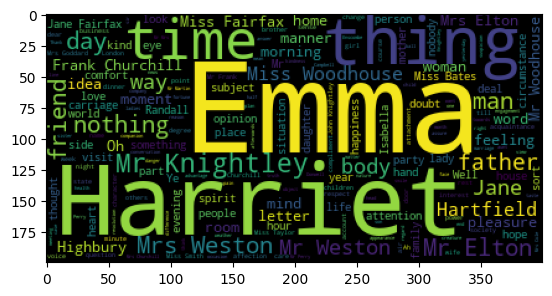

In [99]:
# 워드 클라우드
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

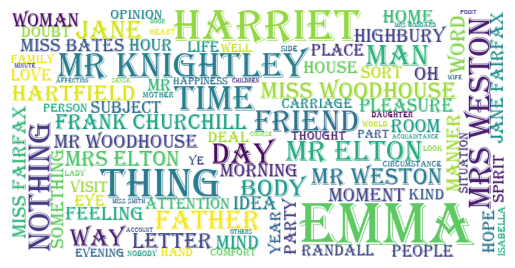

In [109]:
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/ALGER.TTF',
    background_color='white', # 배경색
    width=800, height=400, # 생성될 이미지 가로 세로(픽셀)
    max_words = 100, # 최대 표시될 단어 개수
    relative_scaling=0.6, # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    max_font_size=100, # 최대 폰트 사이즈
    min_font_size=10, # 최소 폰트 사이즈
    contour_width = 1, #테두리 두께
    contour_color='green' # 테두리 색상
)
wordcloud.generate(emma_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [112]:
# data에서 명사추출 -> 연결 -> 워드클라우드
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = MeCab()
noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP')]

from nltk import FreqDist
import pandas as pd
noun_wordcount = FreqDist(noun_list)
wordcnt = pd.Series(noun_wordcount)
wordcnt.sort_values(ascending=False,inplace=True)
wordcnt.head(10)

법률     121
대통령     84
조       79
국가      73
헌법      69
국민      69
국회      69
때       55
필요      31
위원      30
dtype: int64

명사 추출 : ['대한민국', '헌법', '역사', '전통', '국민']
워드클라우드를 그릴 data :  대한민국 헌법 역사 전통 국민 운동 


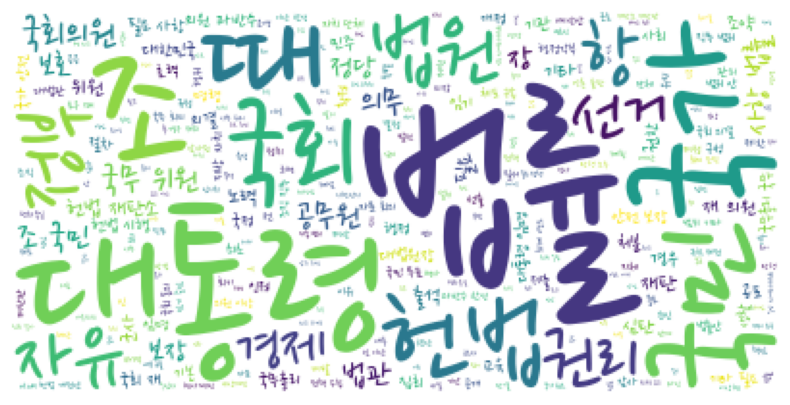

In [118]:
# data에서 명사추출 -> 연결 -> 워드클라우드
data_noun = ' '.join(noun_list)
print('명사 추출 :',noun_list[:5])
print('워드클라우드를 그릴 data : ',data_noun[:20])


wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color = 'white',
    max_words=300
    
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()




In [123]:
# 불용어(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령', '조', '때', '항'} # | :집합 합 연산자
# a = {'네모', '세모'}
# b = {'네모', '동그라미'}
# a|b

불용어 = {'대통령', '조', '때', '항'}
불용어

{'네모', '동그라미', '세모'}

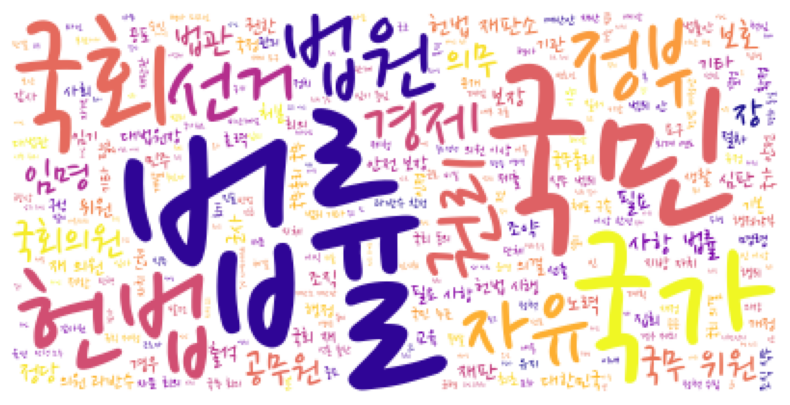

In [125]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color = 'white',
    max_words=300,
    
    colormap='plasma',
    stopwords=불용어
    
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


(numpy.ndarray, (468, 720, 3))

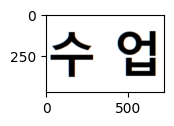

In [129]:
# 이미지를 넘파이 배열로(방법1)
import cv2 
mask = cv2.imread('data/test.png')
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

(numpy.ndarray, (468, 720, 3))

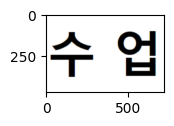

In [137]:
# 이미지를 넘파이 배열로(방법2)
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 3채널 이미지


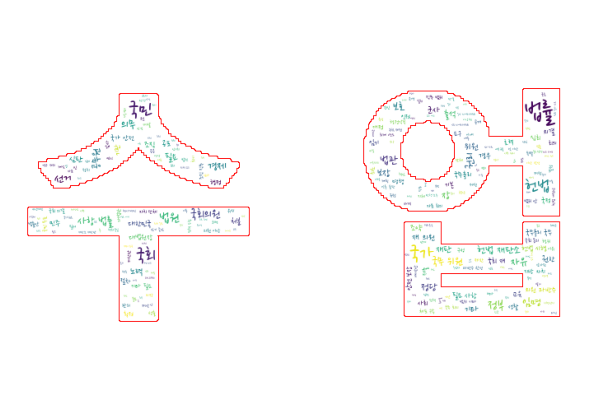

In [141]:

wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 폰트 설정 요망
    background_color='white',  # 배경색
    max_words=300,        # 표시될 단어의 최대 갯수
    #relative_scaling=0.6 # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    stopwords=불용어,  # 불용어
    mask=mask,
    contour_color='red', # 테두리 색상
    contour_width=1 # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


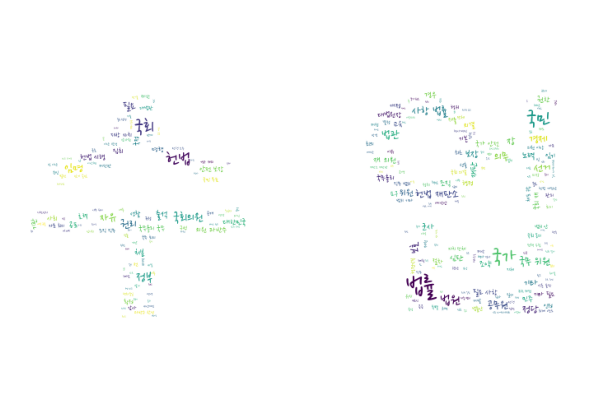

In [140]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 폰트 설정 요망
    background_color='white',  # 배경색
    max_words=300,        # 표시될 단어의 최대 갯수
    #relative_scaling=0.6 # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    stopwords=불용어,  # 불용어
    mask=mask,
    # contour_color='red', # 테두리 색상
    # contour_width=1 # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1600, 1600))

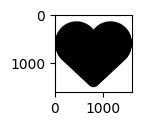

In [142]:
# mask = cv2.imread('data/heart.jpg')
img = Image.open('data/heart.jpg')
mask = np.array(img)
plt.figure(figsize=(2, 1))
plt.imshow(mask, cmap='gray')
type(mask), mask.shape # 흑백이미지

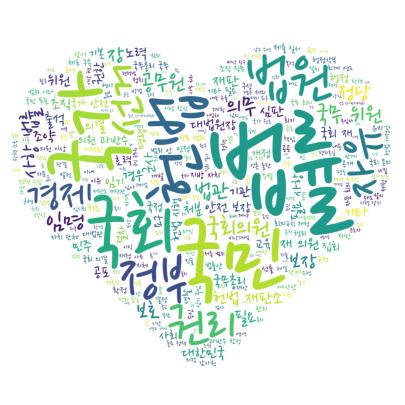

In [143]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 폰트 설정 요망
    background_color='white',  # 배경색
    max_words=300,        # 표시될 단어의 최대 갯수
    #relative_scaling=0.6 # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    stopwords=불용어,  # 불용어
    mask=mask,
    # contour_color='red', # 테두리 색상
    # contour_width=1 # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [150]:

# 이미지 전처리 : 옅은 회색->하얀색
# mask = cv2.imread('data/test2.jpg')
img = Image.open('data/test2.jpg')
mask = np.array(img)

(1124, 720, 3)


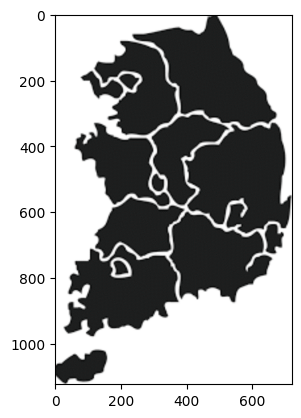

In [152]:
# 1채널이미지 -> 3채널 : convert('RGB')
img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.imshow(mask)
print(mask.shape)

In [1]:
wordcloud.to_file('data/korea.jpg')

NameError: name 'wordcloud' is not defined

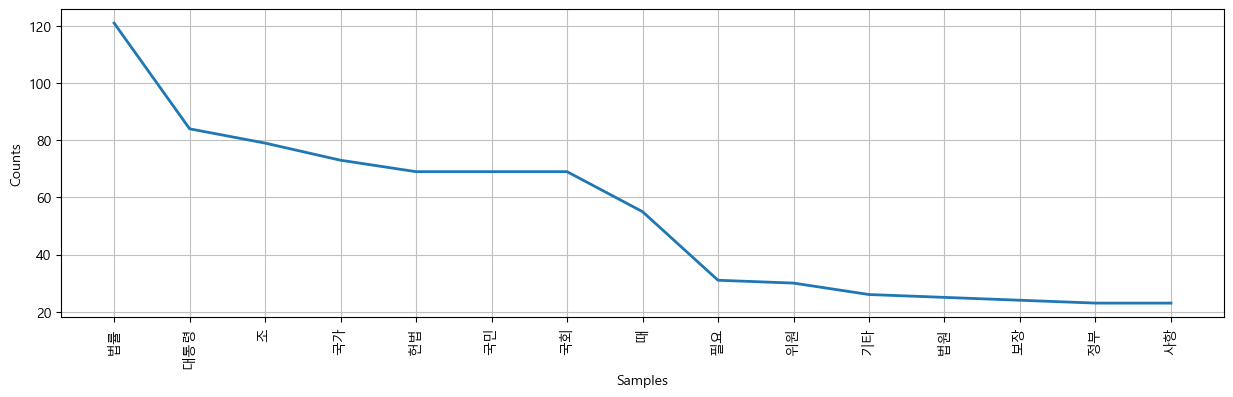

In [154]:
# 단어의 빈도수를 그래프로 시각화(nltk.Text)
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font', family='Malgun Gothic') # 윈도우즈에서 한글 처리
data_text.plot(15)
plt.show()